In [33]:
import os
import shutil
from pathlib import Path
HOME = os.getcwd()
print(HOME)

/mnt/d/LocalGit/NTNU_mscThesis


In [34]:
# # copy all target file names to a txt list
# with open("obj_image_filenames.txt", "w") as a:
#     for path, subdirs, files in os.walk(r'./datasets/labels_withObj'):
#        for filename in files:
#         #  f = os.path.join(path, filename)
#          a.write((str(filename) + os.linesep).replace(".txt", ".jpg",-1))

In [35]:
# # copy all files from a text list to a desired folder

# fileListingFile = "obj_image_filenames.txt"

# imgto = "datasets/bad"
# imgfrom = "datasets/SeaDronesSee-ODV2-2/train/images"

# with open(fileListingFile, "r") as file:
#     fileNames = [file.strip() for file in file.readlines()]

# fileNames[0]
# for file in fileNames:
#     if os.path.isfile(os.path.join(imgfrom, file)):
#         shutil.copy(os.path.join(imgfrom, file), os.path.join(imgto, file))

In [36]:
# !pip install pybboxes

import cv2
import matplotlib.pyplot as plt
import pybboxes as pbx
import numpy as np

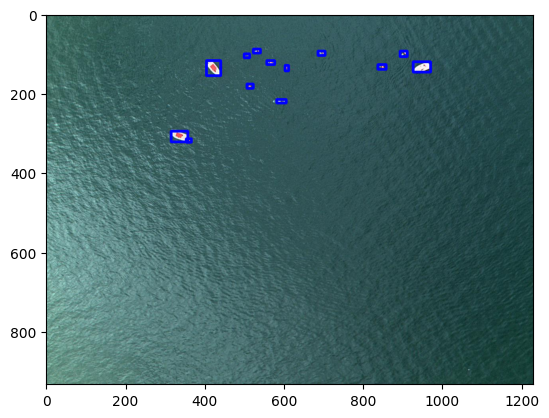

In [37]:
def yolobboxShow(path=os.getcwd(),file_name ="", img_extension = ".jpg", lbl_extension = ".txt"):

    # img = cv2.cvtColor(cv2.imread(path+"images/"+file_name+img_extension), cv2.COLOR_BGR2RGB)
    img = cv2.imread(path+"images/"+file_name+img_extension)
    
    dh, dw, _ = img.shape

    fl = open((path+"labels/"+file_name+lbl_extension), 'r')
    data = fl.readlines()
    fl.close()

    for dt in data:

        # Split string to float
        _, x, y, w, h = map(float, dt.split(' '))

        # Taken from https://github.com/pjreddie/darknet/blob/810d7f797bdb2f021dbe65d2524c2ff6b8ab5c8b/src/image.c#L283-L291
        # via https://stackoverflow.com/questions/44544471/how-to-get-the-coordinates-of-the-bounding-box-in-yolo-object-detection#comment102178409_44592380
        l = int((x - w / 2) * dw)
        r = int((x + w / 2) * dw)
        t = int((y - h / 2) * dh)
        b = int((y + h / 2) * dh)
        
        if l < 0:
            l = 0
        if r > dw - 1:
            r = dw - 1
        if t < 0:
            t = 0
        if b > dh - 1:
            b = dh - 1

        cv2.rectangle(img, (l, t), (r, b), (255, 0, 0), 5)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    
# show yolo bbox in a single image    
yolobboxShow(path="./datasets/SeaDronesSee-ODV2-test/train/",file_name ="2")

### Function "yolobboxCrop_classification()"
#### Crop out yolo objects and save them in folders corresponding to their classes

Folder structure

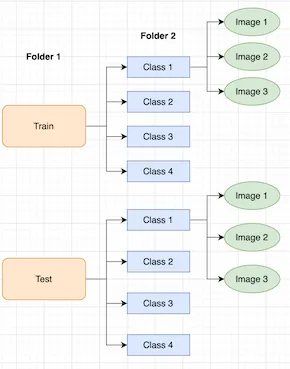

[0.8882, 0.0166, 0.0268, 0.0332]
1 1076 0 33 31
[0.7817, 0.1334, 0.0268, 0.0439]
1 945 104 33 41
[0.5646, 0.2315, 0.0366, 0.0214]
1 672 206 45 20
[0.6118, 0.0096, 0.0154, 0.0129]
0 743 3 19 12
[0.6614, 0.1468, 0.0122, 0.0129]
0 806 131 15 12
[0.7073, 0.0723, 0.0081, 0.0118]
0 865 62 10 11
[0.624, 0.1677, 0.0106, 0.0139]
0 761 150 13 13
[0.611, 0.0954, 0.0122, 0.0129]
0 744 83 15 12
[0.5813, 0.0589, 0.0081, 0.0107]
0 710 50 10 10
[0.5293, 0.0665, 0.013, 0.0193]
0 643 53 16 18
[0.4305, 0.0054, 0.0122, 0.0107]
0 522 0 15 10
[0.3967, 0.0225, 0.0081, 0.0257]
0 483 9 10 24


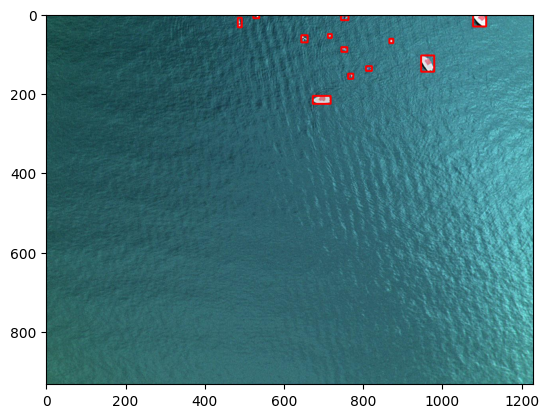

In [38]:

def yolobboxCrop_classification(path=os.getcwd(),file_name ="", img_extension = ".jpg", lbl_extension = ".txt", crop_padding = 0):

    # img = cv2.cvtColor(cv2.imread(path+"images/"+file_name+img_extension))
    img = cv2.imread(path+"images/"+file_name+img_extension)
    
    H, W = img.shape[:2]

    fl = open((path+"labels/"+file_name+lbl_extension), 'r')
    data = fl.readlines()
    fl.close()

    for i, dt in enumerate (data):

        # Split string to float
        yoloclass, *yolo_normalized = np.fromstring(dt, dtype=float, sep=' ')[:]    #class, x, y, w, h  as %
        print( yolo_normalized )
        
        x,y,w,h = pbx.convert_bbox(yolo_normalized, from_type="yolo", to_type="coco", image_size=(W,H)) #box_coco = [x,y,w,h]
        yoloclass = str(int(yoloclass))
        print(yoloclass,x,y,w,h) 
        # print(box_coco) 
        
        
        # print([x, y, w, h])
        cropped_image = img[y:y+h, x:x+w]
        
        # plt.imshow(cropped_image, interpolation='nearest', aspect='auto')     
        # plt.show()
        Path(os.path.join(path , yoloclass)).mkdir(parents=True, exist_ok=True)
        
        out_file_name = file_name+'_'+str(i)+img_extension
        
        cv2.imwrite(os.path.join(path , yoloclass, out_file_name), cropped_image)
        
        
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 3)   # img, (x,y), (x+w,y+h), (b,g,r)
        
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    
# crop and save yolo bboxes in a single image 
yolobboxCrop_classification(path="./datasets/SeaDronesSee-ODV2-test/train/",file_name ="9")

### Loop through the whole dataset (or Part of it)

11
[0.6508, 0.5847, 0.0138, 0.0161]
0 792 538 17 15
[0.6016, 0.4405, 0.013, 0.0129]
0 732 405 16 12
[0.887, 0.4453, 0.0293, 0.0418]
1 1073 396 36 39
[0.7768, 0.5686, 0.0268, 0.0418]
1 939 511 33 39
[0.5528, 0.6683, 0.0358, 0.0247]
1 658 612 44 23
[0.3947, 0.4116, 0.035, 0.0214]
1 464 374 43 20
[0.387, 0.4625, 0.0081, 0.0225]
0 471 421 10 21
[0.4252, 0.4394, 0.0114, 0.015]
0 516 403 14 14
[0.5191, 0.4957, 0.0106, 0.0182]
0 632 454 13 17
[0.5732, 0.4936, 0.0114, 0.0118]
0 698 455 14 11
[0.6045, 0.5273, 0.0138, 0.0129]
0 735 486 17 12
[0.6134, 0.604, 0.0122, 0.0118]
0 747 558 15 11
[0.7008, 0.5048, 0.0098, 0.0107]
0 856 466 12 10


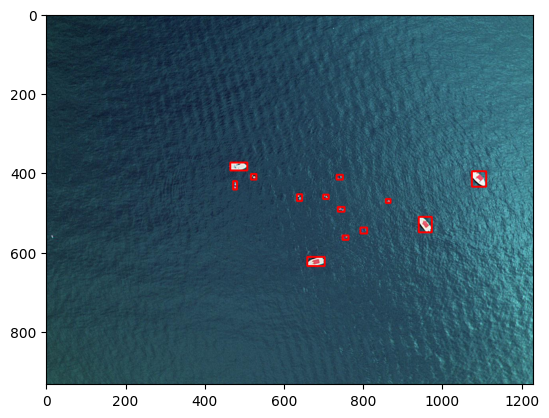

12
[0.698, 0.6977, 0.0089, 0.015]
0 853 644 11 14
[0.6004, 0.7133, 0.0122, 0.0118]
0 731 660 15 11
[0.5675, 0.6795, 0.0114, 0.015]
0 691 627 14 14
[0.6037, 0.7937, 0.0138, 0.0161]
0 734 733 17 15
[0.6411, 0.7749, 0.0154, 0.015]
0 779 716 19 14
[0.5976, 0.6265, 0.013, 0.0139]
0 727 578 16 13
[0.5138, 0.6758, 0.0098, 0.0182]
0 626 622 12 17
[0.4207, 0.6168, 0.0138, 0.0161]
0 509 568 17 15
[0.3837, 0.6409, 0.0081, 0.0236]
0 467 587 10 22
[0.3923, 0.5879, 0.035, 0.0225]
1 461 538 43 21
[0.5419, 0.8548, 0.0366, 0.0289]
1 644 784 45 27
[0.7711, 0.7647, 0.0285, 0.0439]
1 931 693 35 41
[0.885, 0.6447, 0.0301, 0.0439]
1 1070 581 37 41


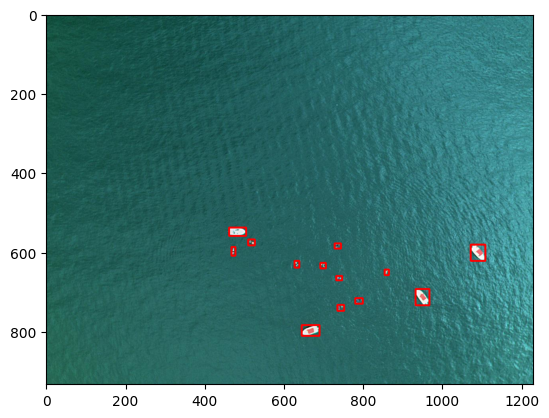

2
[0.2732, 0.3312, 0.0341, 0.0279]
1 315 296 42 26
[0.3435, 0.1468, 0.0285, 0.0407]
1 405 118 35 38
[0.7707, 0.1436, 0.0358, 0.0279]
1 926 121 44 26
[0.2927, 0.3419, 0.0098, 0.0107]
0 354 314 12 10
[0.4179, 0.1956, 0.013, 0.0118]
0 506 177 16 11
[0.4325, 0.0997, 0.0146, 0.0107]
0 523 88 18 10
[0.4602, 0.1318, 0.0163, 0.0107]
0 556 118 20 10
[0.4935, 0.1458, 0.0081, 0.015]
0 602 129 10 14
[0.565, 0.1066, 0.0146, 0.0118]
0 686 94 18 11
[0.7333, 0.1072, 0.0146, 0.015]
0 893 93 18 14
[0.689, 0.1431, 0.0171, 0.0139]
0 837 127 21 13
[0.4829, 0.2358, 0.0195, 0.0107]
0 582 215 24 10
[0.4118, 0.1136, 0.0106, 0.0107]
0 500 101 13 10


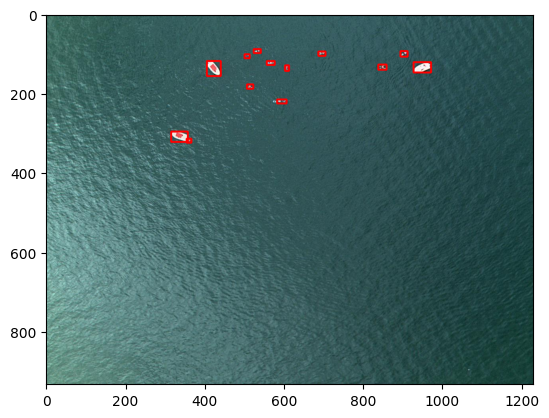

5
[0.2266, 0.7503, 0.0227, 0.0129]
0 265 694 28 12
[0.1527, 0.6077, 0.0114, 0.015]
0 181 560 14 14
[0.1742, 0.5959, 0.0138, 0.0129]
0 206 550 17 12
[0.5028, 0.7085, 0.0357, 0.0279]
1 597 648 44 26
[0.4797, 0.6635, 0.0138, 0.0107]
1 582 614 17 10
[0.4326, 0.6913, 0.0138, 0.015]
1 524 638 17 14
[0.3148, 0.6313, 0.0154, 0.0107]
1 378 584 19 10
[0.2323, 0.6602, 0.013, 0.0129]
1 278 610 16 12
[0.2088, 0.6377, 0.0146, 0.0129]
1 248 589 18 12
[0.147, 0.6945, 0.0114, 0.015]
1 174 641 14 14
[0.0662, 0.6345, 0.0301, 0.045]
1 63 571 37 42
[0.1491, 0.395, 0.0382, 0.0268]
1 160 356 47 25


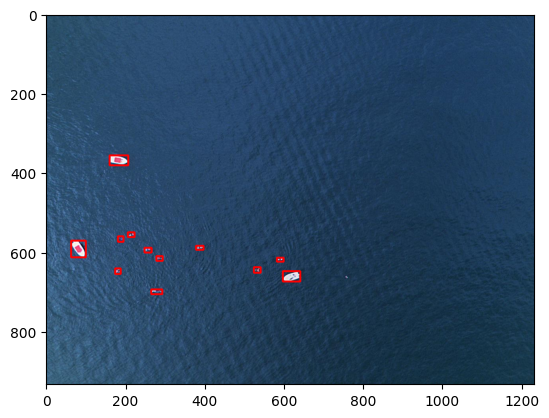

7
[0.2579, 0.9893, 0.0154, 0.0107]
0 308 918 19 10
[0.2368, 0.992, 0.0154, 0.0161]
0 282 918 19 15
[0.279, 0.791, 0.0349, 0.0407]
1 322 719 43 38
[0.1438, 0.9893, 0.0211, 0.0214]
1 164 913 26 20


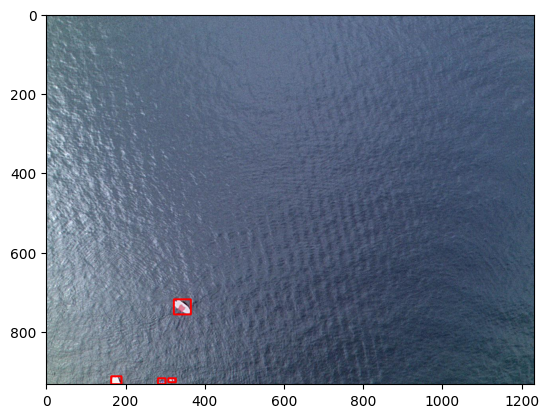

8
[0.5776, 0.0841, 0.0357, 0.0247]
1 689 67 44 23
[0.673, 0.007, 0.0138, 0.0139]
0 820 0 17 13
[0.6348, 0.0214, 0.0171, 0.0129]
0 771 14 21 12


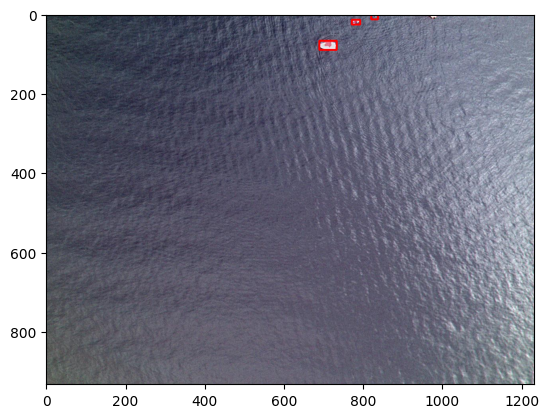

8488
[0.3034, 0.7648, 0.0203, 0.0463]
0 1126 1602 78 100
[0.5277, 0.4917, 0.0128, 0.0222]
0 2002 1038 49 48
[0.6802, 0.4331, 0.0161, 0.0245]
0 2581 909 62 53
[0.3236, 0.5285, 0.0112, 0.0144]
0 1221 1126 43 31
[0.3529, 0.5741, 0.0083, 0.0176]
0 1339 1221 32 38
[0.5831, 0.3671, 0.0089, 0.0167]
0 2222 775 34 36
[0.5975, 0.2977, 0.0169, 0.012]
0 2262 630 65 26
[0.3891, 0.5231, 0.0083, 0.0139]
0 1478 1115 32 30
[0.0594, 0.713, 0.0255, 0.0556]
4 179 1480 98 120
[0.6094, 0.2954, 0.0089, 0.0111]
3 2323 626 34 24


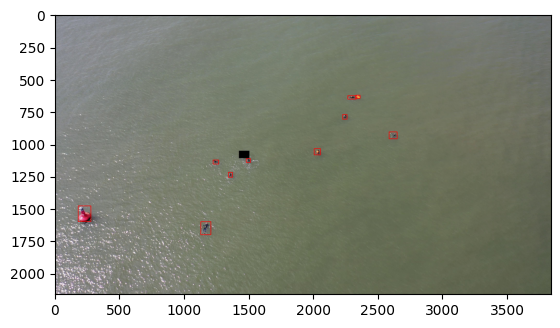

9
[0.8882, 0.0166, 0.0268, 0.0332]
1 1076 0 33 31
[0.7817, 0.1334, 0.0268, 0.0439]
1 945 104 33 41
[0.5646, 0.2315, 0.0366, 0.0214]
1 672 206 45 20
[0.6118, 0.0096, 0.0154, 0.0129]
0 743 3 19 12
[0.6614, 0.1468, 0.0122, 0.0129]
0 806 131 15 12
[0.7073, 0.0723, 0.0081, 0.0118]
0 865 62 10 11
[0.624, 0.1677, 0.0106, 0.0139]
0 761 150 13 13
[0.611, 0.0954, 0.0122, 0.0129]
0 744 83 15 12
[0.5813, 0.0589, 0.0081, 0.0107]
0 710 50 10 10
[0.5293, 0.0665, 0.013, 0.0193]
0 643 53 16 18
[0.4305, 0.0054, 0.0122, 0.0107]
0 522 0 15 10
[0.3967, 0.0225, 0.0081, 0.0257]
0 483 9 10 24


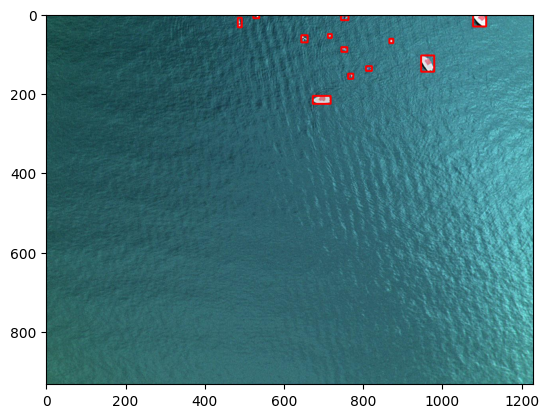

In [39]:
path="./datasets/SeaDronesSee-ODV2-test/train/labels"

# get file names
for path, subdirs, files in os.walk(path):
    for filename in files:
        
        print(filename.replace(".txt", "",-1))
        yolobboxCrop_classification(path="./datasets/SeaDronesSee-ODV2-test/train/",file_name =filename.replace(".txt", "",-1))